In [1]:
import pandas as pd
import networkx as nx
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from scipy.stats import pearsonr
%matplotlib inline

# Phylum

In [2]:
# Sample Data Preparation
df_microbe = pd.read_csv('../feature_tables/phylum-final-table.tsv', sep='\t', index_col=0)
df_microbe.index.name = 'sample_id'
df_microbe_transposed = df_microbe.transpose()
df_microbe_transposed.columns = df_microbe_transposed.columns.str.split(';').str.get(-1)
df_microbe_transposed.columns = df_microbe_transposed.columns.str.replace('p__', '')
df_microbe_relative = df_microbe_transposed.div(df_microbe_transposed.sum(axis=1), axis=0) * 100
df_microbe_relative.head()

sample_id,Firmicutes,Actinobacteriota,Bacteroidota,Proteobacteria,Fusobacteriota,Patescibacteria,Desulfobacterota,Euryarchaeota,Elusimicrobiota,Synergistota,Cyanobacteria,Verrucomicrobiota,Campilobacterota
CCN1,29.765943,69.227734,0.000000,0.991290,0.005638,0.009396,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
CCN10a,66.914334,3.810535,23.205519,3.396577,0.705851,0.010614,0.007076,0.0,0.0,0.0,0.0,0.002654,1.946840
CCN11,16.898437,12.040809,7.936294,27.184978,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,25.747219,10.192262
CCN12,1.629193,1.210524,37.349460,59.807722,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.003101
CCN13,52.455220,4.847717,0.016887,42.570412,0.000000,0.100115,0.000000,0.0,0.0,0.0,0.0,0.009650,0.000000


In [3]:
df_metabolite = pd.read_csv('../metabolites/full_metabolite_shared_scaled_table.tsv', sep='\t', index_col=0)
df_metabolite.index.name = 'sample_id'
df_metabolite_transposed = df_metabolite.transpose()
df_metabolite_relative = df_metabolite_transposed.div(df_metabolite_transposed.sum(axis=1), axis=0) * 100
df_metabolite_relative.head()

sample_id,1-Methyladenosine,3-Methylthiopropionate,Citrulline,Creatinine,Cysteate,Glucose-6-phosphate,Glutamine,Guanosine,Homoserine-Threonine,Homovanillic-acid,...,Proline,Serine,Succinate-Methylmalonate,Taurine,Thymine,Tryptophan,Tyrosine,Uracil,Uric-acid,Valine
CCN1,0.352160,0.004132,0.173750,0.011668,0.009842,0.005575,0.045042,0.003387,0.131996,43.930488,...,0.000000,0.000000,27.165970,1.519981,0.000000,0.066692,0.935649,0.320607,0.000000,0.965751
CCN2,0.033415,0.113685,1.087498,0.000000,0.006070,0.000085,0.086772,0.033194,0.175441,2.090383,...,0.930568,0.094559,5.831058,0.054166,1.057673,0.357042,1.110898,6.241806,3.124172,2.500898
CCN3,1.016730,0.241583,2.579891,0.000000,0.003699,0.001857,0.620935,0.000000,1.159510,0.339351,...,0.652379,0.606582,4.001781,0.046649,3.093337,0.833144,8.760398,3.371221,0.000000,4.270072
CCN4,5.399372,0.000167,0.000000,2.783562,0.003400,0.071618,0.023168,0.002304,0.245624,2.494299,...,0.000000,0.000000,0.000000,1.372472,0.192598,0.151860,1.496963,0.000000,74.524176,0.775895
CCN5,0.486771,0.000000,0.278369,0.026213,0.012156,0.018787,0.151417,0.004434,1.173483,0.041366,...,0.640397,0.272997,29.150085,3.640998,0.455694,0.453115,4.989098,0.480950,5.209161,3.350382


In [4]:
# Assuming both df_microbe_transposed and df_metabolite_transposed have 'sample_id' as the index
merged_data_nonrel = pd.merge(df_microbe_transposed, df_metabolite_transposed, left_index=True, right_index=True, how='inner')
merged_data_relative = pd.merge(df_microbe_relative, df_metabolite_relative, left_index=True, right_index=True, how='inner')

In [5]:
# Calculate Correlation
correlation_matrix = merged_data_relative.corr(method='pearson')
correlation_matrix.to_csv('full_correlation_matrix.csv')

# Assuming df_microbe_transposed is your DataFrame
num_microbe_columns = df_microbe_transposed.shape[1]

# Assuming df_metabolite_transposed is your DataFrame
num_metabolite_columns = df_metabolite_transposed.shape[1]

# Get the column names for microbes and metabolites
microbe_columns = df_microbe_transposed.columns
metabolite_columns = df_metabolite_transposed.columns

# Extract the submatrix for microbe-metabolite correlations
submatrix = correlation_matrix.loc[microbe_columns, metabolite_columns]
submatrix.to_csv('microbe_metabolite_correlations.csv')

# Filter based on the sample_id "Campilobacterota"
Campilobacterota_matrix = submatrix.loc[['Campilobacterota'],]

print("Microbe columns:", len(microbe_columns))
print("Metabolite columns:", len(metabolite_columns))
print("Shape of matrix:", correlation_matrix.shape)
print("Shape of submatrix:", submatrix.shape)

Microbe columns: 13
Metabolite columns: 34
Shape of matrix: (47, 47)
Shape of submatrix: (13, 34)


In [6]:
# Open a text file for writing
with open('correlation_results.txt', 'w') as file:
    # Calulcate significant pearson correlations
    for microbe in submatrix.index:
        for metabolite in submatrix.columns:
            correlation_coefficient = submatrix.loc[microbe, metabolite]

            # Extract abundance data for the specific microbe and metabolite
            microbe_data = merged_data_relative[microbe]
            metabolite_data = merged_data_relative[metabolite]

            # Perform the significance test
            _, p_value = pearsonr(microbe_data, metabolite_data)

            # Check if the p-value is below the significance threshold (e.g., 0.05)
            if p_value < 0.05:
                output = f"{microbe} and {metabolite} correlation ({round(correlation_coefficient,3)}) is statistically significant ({p_value})."
                print(output)
                
                # Write the output to the text file
                file.write(output + '\n')

Firmicutes and Taurine correlation (-0.425) is statistically significant (0.0078086708032759295).
Firmicutes and Thymine correlation (0.347) is statistically significant (0.03276046608908454).
Firmicutes and Uracil correlation (0.329) is statistically significant (0.043876790875220464).
Actinobacteriota and Glutamine correlation (0.375) is statistically significant (0.020323474831955478).
Actinobacteriota and Homoserine-Threonine correlation (0.372) is statistically significant (0.021509967831100207).
Actinobacteriota and Homovanillic-acid correlation (0.457) is statistically significant (0.0039391040484605885).
Actinobacteriota and Lysine correlation (0.394) is statistically significant (0.01438204147731362).
Actinobacteriota and Orotate correlation (0.334) is statistically significant (0.04046881886726344).
Actinobacteriota and Valine correlation (-0.335) is statistically significant (0.03992363778369012).
Proteobacteria and Taurine correlation (0.357) is statistically significant (0

<Figure size 3000x1000 with 0 Axes>

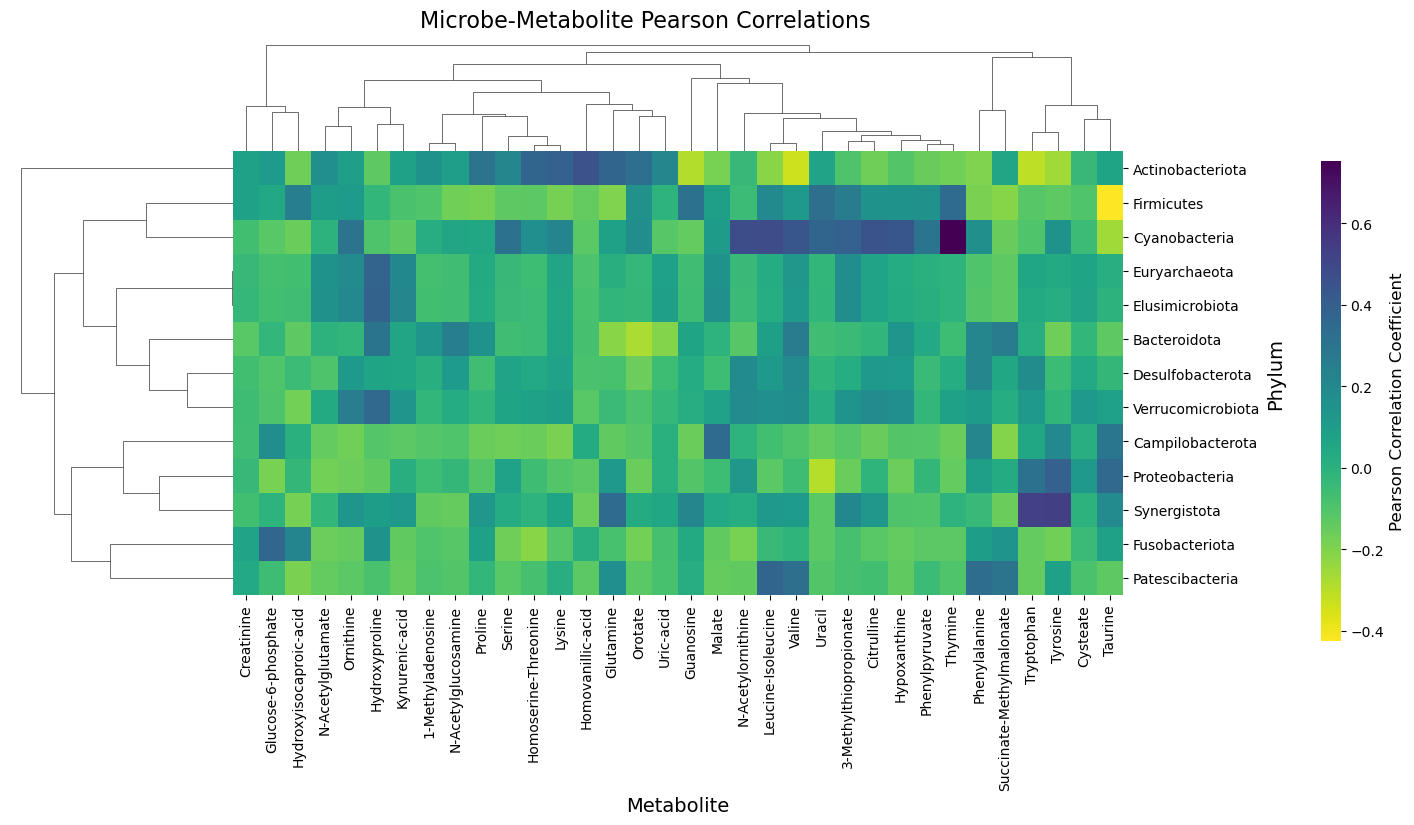

In [6]:
# Visualization using Clustermap with Dendrogram
plt.figure(figsize=(30, 10))
clustermap = sns.clustermap(submatrix, annot=False, cmap='viridis_r', method='average', metric='correlation', figsize=(13, 8))

# Access the axes and adjust labels
ax_heatmap = clustermap.ax_heatmap
ax_heatmap.set_ylabel("Phylum", fontsize=14)
ax_heatmap.set_xlabel("Metabolite", fontsize=14)

# Add legend title "Pearson Correlation"
colorbar = ax_heatmap.collections[0].colorbar
colorbar.set_label("Pearson Correlation Coefficient", fontsize=12)

# Adjust the position of the colorbar closer to the plot
colorbar.ax.set_position([1.02, 0.23, 0.015, 0.6])

plt.suptitle('Microbe-Metabolite Pearson Correlations', fontsize=16, y=1.02)

# Save the figure with adjusted height, width, and reduced white space
plt.savefig('heatmap_phylum_plot_with_dendrogram.pdf', bbox_inches='tight', pad_inches=0.1)

plt.show()

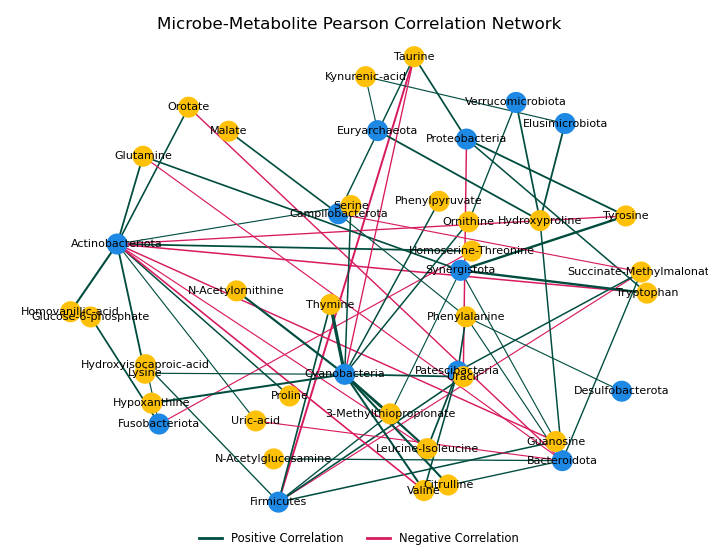

In [42]:
# Threshold for considering correlations
threshold = 0.2  # Adjust this threshold as needed

# Minimum and maximum edge width
min_edge_width = 0.25
max_edge_width = 3

# Create a graph from the submatrix
G = nx.Graph()

# Add nodes for microbes and metabolites with bipartite attribute
bipartite_attributes = {}
for microbe in submatrix.index:
    G.add_node(microbe, bipartite=0)  # Microbes
    bipartite_attributes[microbe] = 'Microbe'

for metabolite in submatrix.columns:
    G.add_node(metabolite, bipartite=1)  # Metabolites
    bipartite_attributes[metabolite] = 'Metabolite'

# Add edges for strong correlations
for microbe in submatrix.index:
    for metabolite in submatrix.columns:
        correlation = submatrix.loc[microbe, metabolite]
        if abs(correlation) > threshold:
            # Color edges based on the sign of the correlation
            edge_color = '#004D40' if correlation > 0 else '#D81B60'  # Green for positive, Red for negative
            # Scale edge width to be more prominent
            edge_width = min_edge_width + (max_edge_width - min_edge_width) * abs(correlation)
            G.add_edge(microbe, metabolite, weight=correlation, color=edge_color, width=edge_width)

# Remove nodes without edges
isolated_nodes = [node for node, degree in dict(G.degree()).items() if degree == 0]
G.remove_nodes_from(isolated_nodes)

# Assign bipartite attribute to each node in the graph
nx.set_node_attributes(G, bipartite_attributes, 'bipartite')

# Create node colors based on bipartite attribute
node_colors = {'Microbe': '#1E88E5', 'Metabolite': '#FFC107'}  # Blue for Microbe, Yellow for Metabolite
colors = [node_colors[G.nodes[node]['bipartite']] for node in G.nodes]

# Draw the graph using spring_layout for a more scattered arrangement
pos = nx.spring_layout(G, k=0.5)

# Draw nodes with black font color
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=200)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', font_weight='normal')

# Draw edges with different colors and widths based on the correlation
edge_colors = [G[u][v]['color'] for u, v in G.edges]
edge_widths = [G[u][v]['width'] for u, v in G.edges]
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors)

# Remove the border around the entire network image
plt.axis('off')

# Custom Legend
legend_elements = [Line2D([0], [0], color='#004D40', linewidth=2, label='Positive Correlation'),
                   Line2D([0], [0], color='#D81B60', linewidth=2, label='Negative Correlation')]

# Place the legend to the right of the plot without overlapping
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.05), fontsize='small', frameon=False, ncol=2)

# Display the graph
plt.title('Microbe-Metabolite Pearson Correlation Network', y=0.95)
plt.gcf().set_size_inches(9, 7)
plt.savefig('network_phylum_plot.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

# Class

In [5]:
# Sample Data Preparation
df_microbe = pd.read_csv('../feature_tables/class-final-table.tsv', sep='\t', index_col=0)
df_microbe.index.name = 'sample_id'
df_microbe_transposed = df_microbe.transpose()
df_microbe_transposed.columns = df_microbe_transposed.columns.str.split(';').str.get(-1)
df_microbe_transposed.columns = df_microbe_transposed.columns.str.replace('c__', '')
df_microbe_relative = df_microbe_transposed.div(df_microbe_transposed.sum(axis=1), axis=0) * 100
df_microbe_relative.head()

sample_id,Clostridia,Coriobacteriia,Bacteroidia,Gammaproteobacteria,Fusobacteriia,Bacilli,Saccharimonadia,Actinobacteria,Negativicutes,Incertae_Sedis,Desulfovibrionia,Alphaproteobacteria,Methanobacteria,Elusimicrobia,Synergistia,Vampirivibrionia,Verrucomicrobiae,Campylobacteria
CCN1,22.480198,1.647138,0.000000,0.981894,0.005638,4.828662,0.009396,67.580595,2.457083,0.0,0.000000,0.009396,0.0,0.0,0.0,0.0,0.000000,0.000000
CCN10a,55.483614,0.278625,23.205519,3.396577,0.705851,6.113838,0.010614,3.531909,5.316881,0.0,0.007076,0.000000,0.0,0.0,0.0,0.0,0.002654,1.946840
CCN11,14.645835,0.000000,7.936294,27.181611,0.000000,1.750901,0.000000,12.040809,0.501700,0.0,0.000000,0.003367,0.0,0.0,0.0,0.0,25.747219,10.192262
CCN12,1.166072,0.816664,37.349460,59.807722,0.000000,0.455885,0.000000,0.393860,0.007236,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.003101
CCN13,11.183885,0.000000,0.016887,42.570412,0.000000,41.185694,0.100115,4.847717,0.085640,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.009650,0.000000


In [6]:
df_metabolite = pd.read_csv('../metabolites/full_metabolite_shared_scaled_table.tsv', sep='\t', index_col=0)
df_metabolite.index.name = 'sample_id'
df_metabolite_transposed = df_metabolite.transpose()
df_metabolite_relative = df_metabolite_transposed.div(df_metabolite_transposed.sum(axis=1), axis=0) * 100
df_metabolite_relative.head()

sample_id,1-Methyladenosine,3-Methylthiopropionate,Citrulline,Creatinine,Cysteate,Glucose-6-phosphate,Glutamine,Guanosine,Homoserine-Threonine,Homovanillic-acid,...,Proline,Serine,Succinate-Methylmalonate,Taurine,Thymine,Tryptophan,Tyrosine,Uracil,Uric-acid,Valine
CCN1,0.352160,0.004132,0.173750,0.011668,0.009842,0.005575,0.045042,0.003387,0.131996,43.930488,...,0.000000,0.000000,27.165970,1.519981,0.000000,0.066692,0.935649,0.320607,0.000000,0.965751
CCN2,0.033415,0.113685,1.087498,0.000000,0.006070,0.000085,0.086772,0.033194,0.175441,2.090383,...,0.930568,0.094559,5.831058,0.054166,1.057673,0.357042,1.110898,6.241806,3.124172,2.500898
CCN3,1.016730,0.241583,2.579891,0.000000,0.003699,0.001857,0.620935,0.000000,1.159510,0.339351,...,0.652379,0.606582,4.001781,0.046649,3.093337,0.833144,8.760398,3.371221,0.000000,4.270072
CCN4,5.399372,0.000167,0.000000,2.783562,0.003400,0.071618,0.023168,0.002304,0.245624,2.494299,...,0.000000,0.000000,0.000000,1.372472,0.192598,0.151860,1.496963,0.000000,74.524176,0.775895
CCN5,0.486771,0.000000,0.278369,0.026213,0.012156,0.018787,0.151417,0.004434,1.173483,0.041366,...,0.640397,0.272997,29.150085,3.640998,0.455694,0.453115,4.989098,0.480950,5.209161,3.350382


In [7]:
# Assuming both df_microbe_transposed and df_metabolite_transposed have 'sample_id' as the index
merged_data_nonrel = pd.merge(df_microbe_transposed, df_metabolite_transposed, left_index=True, right_index=True, how='inner')
merged_data_relative = pd.merge(df_microbe_relative, df_metabolite_relative, left_index=True, right_index=True, how='inner')

In [8]:
# Calculate Correlation
correlation_matrix = merged_data_relative.corr(method='pearson')
correlation_matrix.to_csv('full_correlation_matrix_class.csv')

# Assuming df_microbe_transposed is your DataFrame
num_microbe_columns = df_microbe_transposed.shape[1]

# Assuming df_metabolite_transposed is your DataFrame
num_metabolite_columns = df_metabolite_transposed.shape[1]

# Get the column names for microbes and metabolites
microbe_columns = df_microbe_transposed.columns
metabolite_columns = df_metabolite_transposed.columns

# Extract the submatrix for microbe-metabolite correlations
submatrix = correlation_matrix.loc[microbe_columns, metabolite_columns]
submatrix.to_csv('microbe_metabolite_correlations_class.csv')

# Filter based on the sample_id "Campylobacteria"
Campylobacteria_matrix = submatrix.loc[['Campylobacteria'],]

print("Microbe columns:", len(microbe_columns))
print("Metabolite columns:", len(metabolite_columns))
print("Shape of matrix:", correlation_matrix.shape)
print("Shape of submatrix:", submatrix.shape)

Microbe columns: 18
Metabolite columns: 34
Shape of matrix: (52, 52)
Shape of submatrix: (18, 34)


In [9]:
# Open a text file for writing
with open('correlation_results_class.txt', 'w') as file:
    # Calulcate significant pearson correlations
    for microbe in submatrix.index:
        for metabolite in submatrix.columns:
            correlation_coefficient = submatrix.loc[microbe, metabolite]

            # Extract abundance data for the specific microbe and metabolite
            microbe_data = merged_data_relative[microbe]
            metabolite_data = merged_data_relative[metabolite]

            # Perform the significance test
            _, p_value = pearsonr(microbe_data, metabolite_data)

            # Check if the p-value is below the significance threshold (e.g., 0.05)
            if p_value < 0.05:
                output = f"{microbe} and {metabolite} correlation ({round(correlation_coefficient,3)}) is statistically significant ({p_value})."
                print(output)
                
                # Write the output to the text file
                file.write(output + '\n')

Clostridia and 3-Methylthiopropionate correlation (0.333) is statistically significant (0.04075406824321608).
Clostridia and Guanosine correlation (0.345) is statistically significant (0.03379830609629302).
Clostridia and Hypoxanthine correlation (0.464) is statistically significant (0.0033566538842698082).
Clostridia and Ornithine correlation (0.321) is statistically significant (0.04962648942643576).
Clostridia and Phenylpyruvate correlation (0.326) is statistically significant (0.04555929343319654).
Clostridia and Thymine correlation (0.53) is statistically significant (0.0006269096874227889).
Clostridia and Uracil correlation (0.416) is statistically significant (0.009348689663799814).
Coriobacteriia and N-Acetylglutamate correlation (0.426) is statistically significant (0.007732236087666339).
Gammaproteobacteria and Taurine correlation (0.358) is statistically significant (0.027496110614429012).
Gammaproteobacteria and Tyrosine correlation (0.393) is statistically significant (0.0

<Figure size 3000x1000 with 0 Axes>

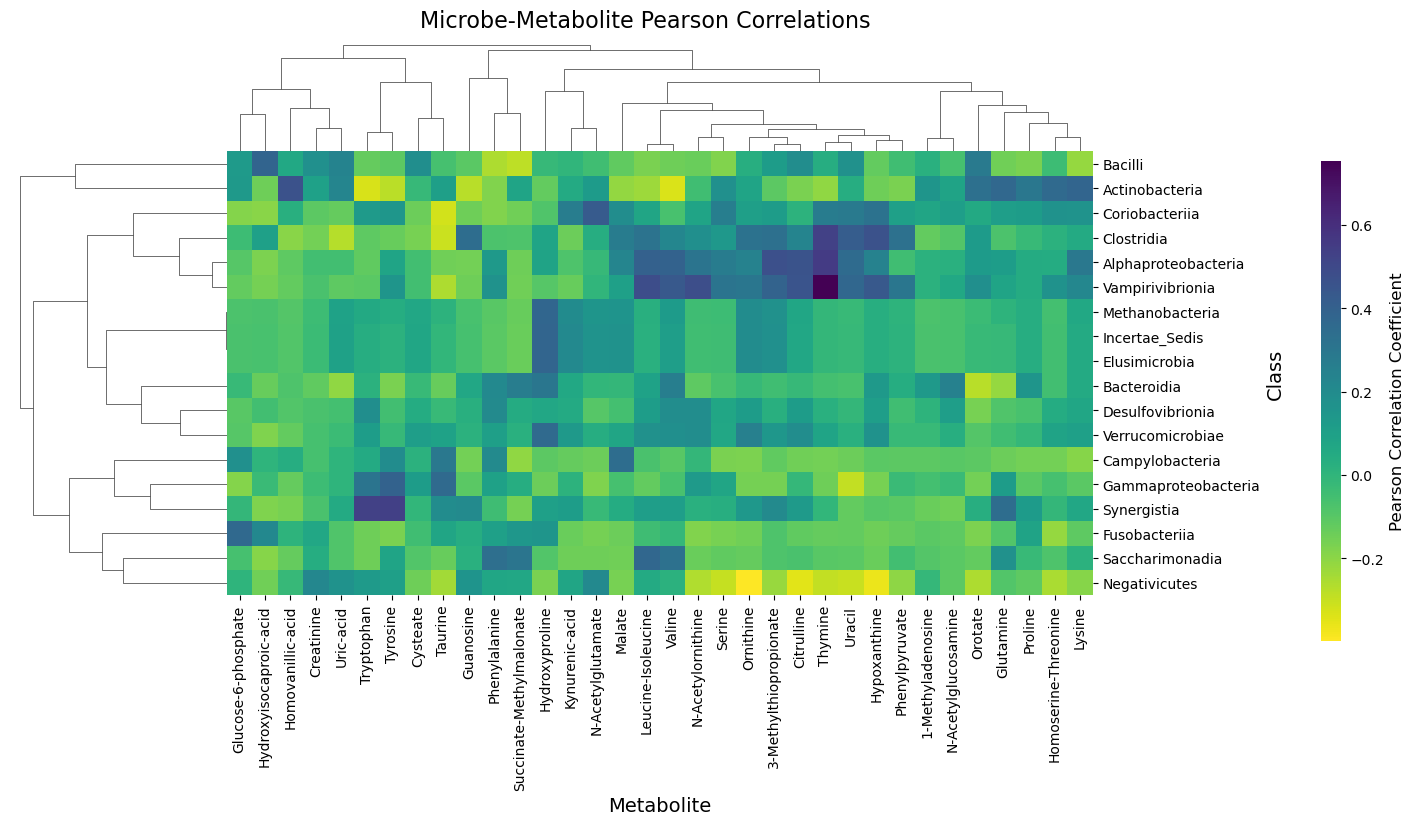

In [10]:
# Visualization using Clustermap with Dendrogram
plt.figure(figsize=(30, 10))
clustermap = sns.clustermap(submatrix, annot=False, cmap='viridis_r', method='average', metric='correlation', figsize=(13, 8))

# Access the axes and adjust labels
ax_heatmap = clustermap.ax_heatmap
ax_heatmap.set_ylabel("Class", fontsize=14)
ax_heatmap.set_xlabel("Metabolite", fontsize=14)

# Add legend title "Pearson Correlation"
colorbar = ax_heatmap.collections[0].colorbar
colorbar.set_label("Pearson Correlation Coefficient", fontsize=12)

# Adjust the position of the colorbar closer to the plot
colorbar.ax.set_position([1.02, 0.23, 0.015, 0.6])

plt.suptitle('Microbe-Metabolite Pearson Correlations', fontsize=16, y=1.02)

# Save the figure with adjusted height, width, and reduced white space
plt.savefig('heatmap_class_plot_with_dendrogram.pdf', bbox_inches='tight', pad_inches=0.1)

plt.show()

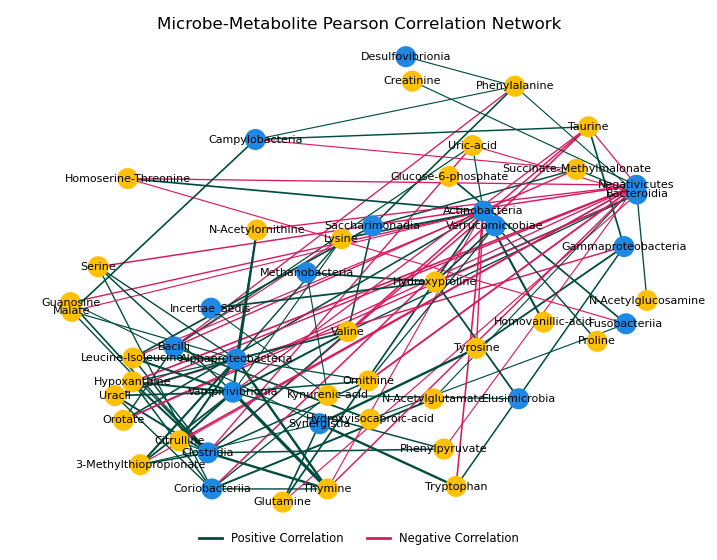

In [11]:
# Threshold for considering correlations
threshold = 0.2  # Adjust this threshold as needed

# Minimum and maximum edge width
min_edge_width = 0.25
max_edge_width = 3

# Create a graph from the submatrix
G = nx.Graph()

# Add nodes for microbes and metabolites with bipartite attribute
bipartite_attributes = {}
for microbe in submatrix.index:
    G.add_node(microbe, bipartite=0)  # Microbes
    bipartite_attributes[microbe] = 'Microbe'

for metabolite in submatrix.columns:
    G.add_node(metabolite, bipartite=1)  # Metabolites
    bipartite_attributes[metabolite] = 'Metabolite'

# Add edges for strong correlations
for microbe in submatrix.index:
    for metabolite in submatrix.columns:
        correlation = submatrix.loc[microbe, metabolite]
        if abs(correlation) > threshold:
            # Color edges based on the sign of the correlation
            edge_color = '#004D40' if correlation > 0 else '#D81B60'  # Green for positive, Red for negative
            # Scale edge width to be more prominent
            edge_width = min_edge_width + (max_edge_width - min_edge_width) * abs(correlation)
            G.add_edge(microbe, metabolite, weight=correlation, color=edge_color, width=edge_width)

# Remove nodes without edges
isolated_nodes = [node for node, degree in dict(G.degree()).items() if degree == 0]
G.remove_nodes_from(isolated_nodes)

# Assign bipartite attribute to each node in the graph
nx.set_node_attributes(G, bipartite_attributes, 'bipartite')

# Create node colors based on bipartite attribute
node_colors = {'Microbe': '#1E88E5', 'Metabolite': '#FFC107'}  # Blue for Microbe, Yellow for Metabolite
colors = [node_colors[G.nodes[node]['bipartite']] for node in G.nodes]

# Draw the graph using spring_layout for a more scattered arrangement
pos = nx.spring_layout(G, k=0.5)

# Draw nodes with black font color
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=200)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', font_weight='normal')

# Draw edges with different colors and widths based on the correlation
edge_colors = [G[u][v]['color'] for u, v in G.edges]
edge_widths = [G[u][v]['width'] for u, v in G.edges]
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors)

# Remove the border around the entire network image
plt.axis('off')

# Custom Legend
legend_elements = [Line2D([0], [0], color='#004D40', linewidth=2, label='Positive Correlation'),
                   Line2D([0], [0], color='#D81B60', linewidth=2, label='Negative Correlation')]

# Place the legend to the right of the plot without overlapping
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.05), fontsize='small', frameon=False, ncol=2)

# Display the graph
plt.title('Microbe-Metabolite Pearson Correlation Network', y=0.95)
plt.gcf().set_size_inches(9, 7)
plt.savefig('network_class_plot.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()